**Trabajo Practico Nº 4**
Analisis sobre data set

1= Buscar los siguiente data set en la web
* Titanic
* Iris
* Wine
* Indian Diabetes

2- Explicar de cada data set , sus diferente Variables

3- Deside justificando tu respuesta que tipo de categoria de variable son

4- Detectar y arreglar los siguientes coceptos

* Valores Ausente
* Valores Atipicos

5- De los difentes data set , se puede eliminar alguna columna

6- Realizar analisis univariados

* Grafico de frecuencia
* Grafico de torta
* Histograma
* etc

7- En base a los graficos del punto 6 realizar distintas concluciones

8- Realizar analisis de corelacion y explicar que variable estan correlacionadas

9-Realizar un analisis de grafico de cherrnoff y detectar outlires

PD Pueden Buscar data set de kaggle

In [ ]:
#librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

#  Dataset Titanic

Contiene información sobre los pasajeros del barco hundido.
Este dataset fue extraido de la pagina web Kaggle. Segun la pagina web los datos estan dividido en dos grupos: i) conjunto de entrenamiento (train.csv) y
ii) conjunto de prueba (test.csv). Sin embargo, para este ejercicio usamos el primero.







In [ ]:
df_titanic = pd.read_csv('https://raw.githubusercontent.com/mrBronnWow/Curso_Beginners/main/1_Dataset_titanic/train.csv')
# Visualizamos los primeros datos
print(f'Las columnas de este dataset son: {df_titanic.columns}')
print(" ---------------     Primeras filas del dataset         ------------------")
df_titanic.head()

Las columnas de este dataset son: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
 ---------------     Primeras filas del dataset         ------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Con sta funcion vemos el tipo de dato que corresponde a cada columna, asi como tambien podemos ver si posee datos nulos
df_titanic.info()
#Tipo de variables
print(df_titanic.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin         

In [ ]:
# Estadisticas de las variables numericas del dataset. Por ejemplo vemos que no se visualizan las columnas "name", "Sex","Ticket","Embarked"
#porque
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Con este metodo vemos las estadisticas basicas de las variables numericas
*   Age: vemos que la media de los pasajeros es de aproximadamente 29 años. En cuanto a la sd, podemos decir que la variabilidad es baja porque no es un valor cercano a la media. Existen bebes  a bordo (menores a 1 año) sin embargo son pocos ya que los cuartiles son 20,28,38, los cuales son muy ceranos. La edad maxima es 80 años, pero el ultimo cuartil es de 38, por este motivo podriamos pensar que hay ciertos outliers en este dataset
*   Fare: la desviacion estandar nos muestra que hay alta variabilidad de los datos porque es mayor que la media. Entre los cuartiles hay diferencias, no son valorres cerca

Las otras variables numericas no las consideramos para el analisis




In [ ]:
# Valores de cada variable
df_titanic.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

## 2. Explicación del dataset y sus diferentes variables.

Con estas funciones podemos ver que este dataset posee 12 columnas:
Segun la documentacion las variables significan:
*   PassengerId: corresponde a una variable numerica continua ya que se trataria de un ID. Que comienza en el 1 hasta el 891.

*   Survived: nos  muestra si la persona ha sobrevivido o no. Siendo 0 = No sobrevivio y 1 Si sobrevivio.Posee valores numericos.Podriamos decir que se trata de una Variable Binaria ya que tiene dos posibles valor. Sin embargo, esta misma variable podria ser tranformada en una variable categorica nominal (1 = SI 0 = NO).

*   Pclass: Se trata *Ticket class*. Donde 1 = 1st, 2 = 2nd, 3 = 3rd, es decir que se trata de valores numericos enteros discretos. Podriamos decir que se trata de un proxy del status socio-economico.

*   Name: es un string donde se especifica el nombre del pasajero, por lo que se trataria de una variable unica e irrepetible a lo largo del dataset

*   Sex: Se trata del genero del pasajero. Puede tomar dos posibles valores en formato string: "male" y "female". Por lo que se trata de una variable de tipo categorica nominal.

*   Age: Se trata de un valor numerico en formato float que corresponde a la edad en años. Corresponde a una variable numerica continua La documentacion menciona que cuando se trata de niños menores a 1 año es fraccional. Tambien menciona, que si la edad es estimada, se presenta en la forma de xx.5. Se puede ver que existen valores faltantantes (hay 714 de 891)

*   SibSp: define las relaciones familiares, particularmente corresponde a número de hermanos/cónyuges a bordo del Titanic. Es una variable numerica que puede tener como valores enteros discretos.

*   Parch: corresponde al numero de padres/hijos a bordo del Titanic. Es una variable numerica que puede tener como valores enteros discretos.

*   Fare: Tarifa del pasajero, es un valor numerico entero. Podriamos decir que se trata de una variable numerica discrta
*   Ticket: es el numero de ticket del pasajero. Sin embargo, podemos visualizar que en algunos casos corresponde a valores numericos, mientras que otros casos esta compuesto por letras y numeros. Pero podemos ver que no son unicos los valores. Ver el caso de Baclini, Miss. Helene Barbara	y Baclini, Miss. Eugenie	que poseen el mismo numero de ticket.

*   Cabin: es el numero de cabina. Sin embargo, podemos visualizar que en algunos casos corresponde a valores numericos, mientras que otros casos esta compuesto por letras y numeros. Ademas, podemos observar que existen datos nulos.

*   Embarked: muestra el puerto de embarcacion. Esta variable es un string y puede tomar tres posibles varlores	C = Cherbourg, Q = Queenstown, S = Southampton. Corresponde a una variable categorica nominal. Tambien tiene algunos valores nulos a considerar.




### 4- Detectar y arreglar los siguientes coceptos:
* Valores Ausente
* Valores Atipicos


# A. Valores ausentes

In [ ]:
# Mostramos cuantos valores hay en cada variable
valoresNull_titanic=df_titanic.isnull().sum()
print("----------    valores ausentes - nulos    ----------")
print(valoresNull_titanic)

valoresNull_titanic= round((df_titanic.isnull().sum()/len(df_titanic))*100,2)
print("----------    Porcentaje de valores ausentes - nulos por variable    ----------")
print(valoresNull_titanic)

----------    valores ausentes - nulos    ----------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------    Porcentaje de valores ausentes - nulos por variable    ----------
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64


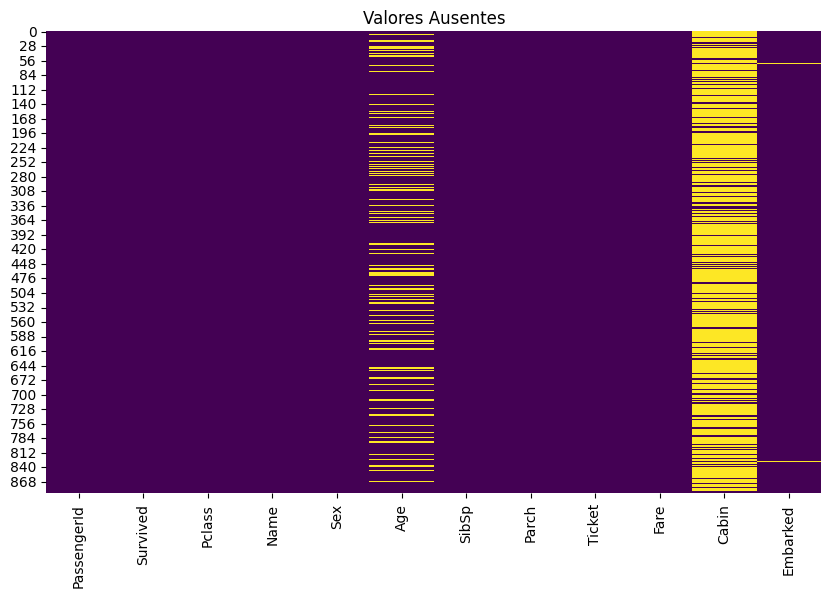

In [ ]:
# Visualización de valores nulos con mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(df_titanic.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Ausentes')
plt.show()

Podemos observar que solo 3 de las 12 variables poseen faltantes nulos: Age, Cabin y Embarked. A la variable "Cabin" le falta el 77% de los datos, seguida por la edad con casi el 20% y solo 2 valores ausentes de "Embarked".
La figura nos muestra un mapa de valores nulos, donde el color violeta nos muestra que hay un valor, mientras que en color amarillo vemos como estan distribuidos segun el ID los valores nulos en las 3 variables mencionadas. Vemos que en Age y Cabin la faltante de datos esta distribuida de forma uniforme a lo largo de todo el dataset.

Sin embargo, podemos pensar que la variable Cabin no presenta un interes esencial. Con esta variable podriamos estimar cuantas personas hay en cada cabina. Mientras que la variable Age, a mi parecer es esencial para entender la poblacion del barco.

Por otro lado, segun lo visto en clase hay varias alternativas para trabajar con valores ausentes:

*   *Eliminar las filas con valores ausentes:* este podria ser el caso de la variable "Embarked" ya que son solo 2 valores ausentes
*   *Imputación de valores*: Esta alternativa podriamos utilizar para la columna "age" colocando la media de las edades
*   *Eliminar columnas con muchos valores ausentes:* Si una columna tiene una gran cantidad de valores ausentes y no es crucial para tu análisis, podrías considerar eliminarla. Este seria el caso a mi parecer de la columna "Cabin". Esta variable podria ser de interes si queremos saber cuantas personas hay por cabin, pero al tener tantos valores vacio, creeria que tampoco vamos a poder saberlo
*   *Modelo de imputación avanzado*
*  *Análisis por grupos*
*   *Crear una categoría "Desconocido"*




DataFrame después del tratamiento:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    object 
 4   Age       889 non-null    float64
 5   SibSp     889 non-null    int64  
 6   Parch     889 non-null    int64  
 7   Ticket    889 non-null    object 
 8   Fare      889 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.4+ KB


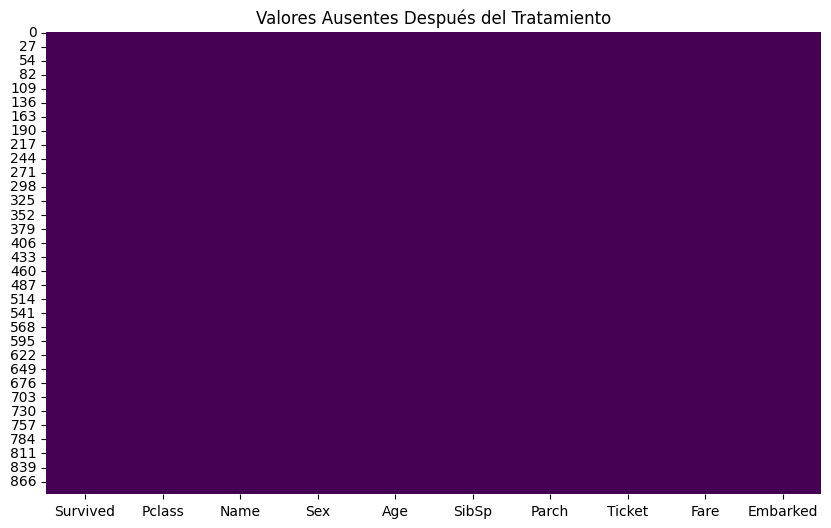

In [ ]:

# Rellenar valores nulos en 'Age' con la media. Es correcto esto? o tenemos que eliminar la columna debido a la faltante de datos
df_titanic['Age'].fillna(df_titanic['Age'].mean(), inplace=True)
df_titanic.dropna(subset=['Embarked'], inplace=True)
df_titanic.drop(columns = ["PassengerId","Cabin"], inplace=True)# inplace: Booleano. Si toma el valor True, la eliminación se realiza en el mismo dataframe. Si toma el valor False, el método devuelve una copia del dataframe tras eliminar las filas o columnas especificadas.
# Mostrar DataFrame después del tratamiento
print("DataFrame después del tratamiento:")
df_titanic.info()
# Visualización de valores nulos con mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(df_titanic.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Ausentes Después del Tratamiento')
plt.show()


Ahora podemos ver que no existen valores nulos en ninguna de las variables. El nuevo dataset tiene un len de 889 mientras que en un principio nuestro dataset tenia un len de 891 datos. Solo eliminamos dos filas provenientes de la variable Embarked.
Tambien eliminamos la columna "PassengerId" ya que se traya del id del pasajero y el namee

#B. Valores atipicos
A este analisis solo lo podemos llevar a cabo siempre y cuando la variable sea numerica. Las variables numericas en este dataset son:


*   Age
*   Fare



In [ ]:
# Valores atipicos a traves del rango intercuartil.
# A partir del primer y tercer cuartil definimos los limites de los valores atipicos, por debajo y por encima de estos limites
# Rango intercuartil
irq_fare = df_titanic['Fare'].quantile(0.75) - df_titanic['Fare'].quantile(0.25)
#definimos limites
lower_bound_fare = df_titanic['Fare'].quantile(0.25) - 1.5 * irq_fare
upper_bound_fare = df_titanic['Fare'].quantile(0.75) + 1.5 * irq_fare

#Identificamos valores atipicos de "fare"
outliers_fare = df_titanic[(df_titanic['Fare']<lower_bound_fare) | (df_titanic['Fare']> upper_bound_fare)]

#Print valores atipicos
print(f'Limite inferior {lower_bound_fare} y Limite superior {upper_bound_fare}')
print(f"El minimo es {df_titanic['Fare'].min()} mientras que el maximo es {df_titanic['Fare'].max()}")
#Cualquier valor fuera de estos límites se considera un valor atípico en la columna 'Cantidad'. Puedes aplicar este mismo enfoque a otras columnas numéricas que desees analizar

Limite inferior -26.7605 y Limite superior 65.6563
El minimo es 0.0 mientras que el maximo es 512.3292


<Axes: title={'center': 'Boxplot variable Fare'}, xlabel=' ', ylabel='Fare'>

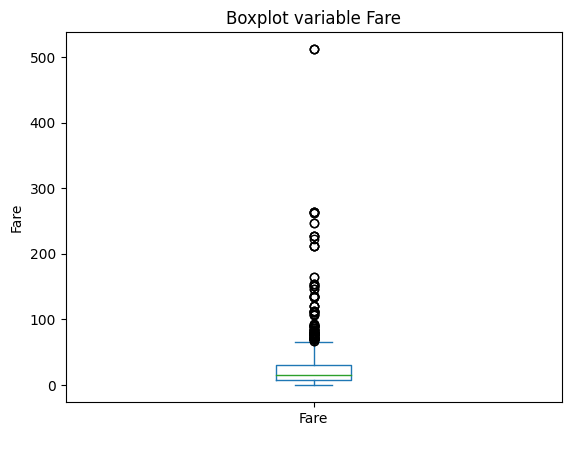

In [ ]:
# Datos atipicos. Una forma de verlos es a traves de boxplots
df_titanic['Fare'].plot.box(title="Boxplot variable Fare",xlabel=" ",ylabel="Fare")
# Aca vemos que los puntos podriamos considerarlos como outliers donde el limite inferior es negativo pero en realidad nuesto minimo es = 0, porlo que en realidad
# los outliers deberiamos considerar solo el limite superior de 65.66 de "Fare"

Limite inferior 2.5 y Limite superior 54.5
El minimo es 0.42 mientras que el maximo es 80.0


<Axes: title={'center': 'Boxplot variable Age'}, xlabel=' ', ylabel='Age'>

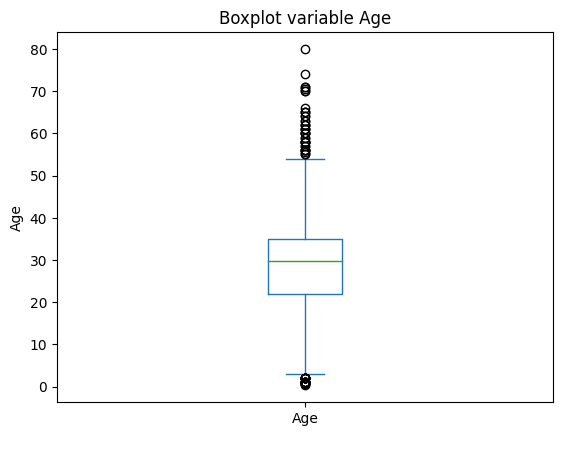

In [ ]:
# Rango intercuartil
irq_age= df_titanic['Age'].quantile(0.75) - df_titanic['Age'].quantile(0.25)
#definimos limites
lower_bound_age = df_titanic['Age'].quantile(0.25) - 1.5 * irq_age
upper_bound_age = df_titanic['Age'].quantile(0.75) + 1.5 * irq_age

#Identificamos valores atipicos de "age"
outliers_age = df_titanic[(df_titanic['Age']<lower_bound_age) | (df_titanic['Age']> upper_bound_age)]

#Print valores atipicos
print(f'Limite inferior {lower_bound_age} y Limite superior {upper_bound_age}')
print(f"El minimo es {df_titanic['Age'].min()} mientras que el maximo es {df_titanic['Age'].max()}")
# Datos atipicos. Una forma de verlos es a traves de boxplots
df_titanic['Age'].plot.box(title="Boxplot variable Age",xlabel=" ",ylabel="Age")
# A diferencia de "Fare" aca si podemos visualizar datos atipicos inferiores y superiores (puntos negros) que estan por debajo de 2.5
# es decir que habia muy pocos niños pequeños y adultos mayores (+54). Recordar que esta variable esta en float porque considera a los
#niños menores de 1 año con forma de fraccion

#6- Realizar analisis univariados



*   Grafico de frecuencia
*   Grafico de torta
*   Histograma


Sobrevivientes: 0    61.616162
1    38.383838
Name: Survived, dtype: float64
Clases: 3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64
Genero: male      64.758698
female    35.241302
Name: Sex, dtype: float64
Embarked: S    72.278339
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


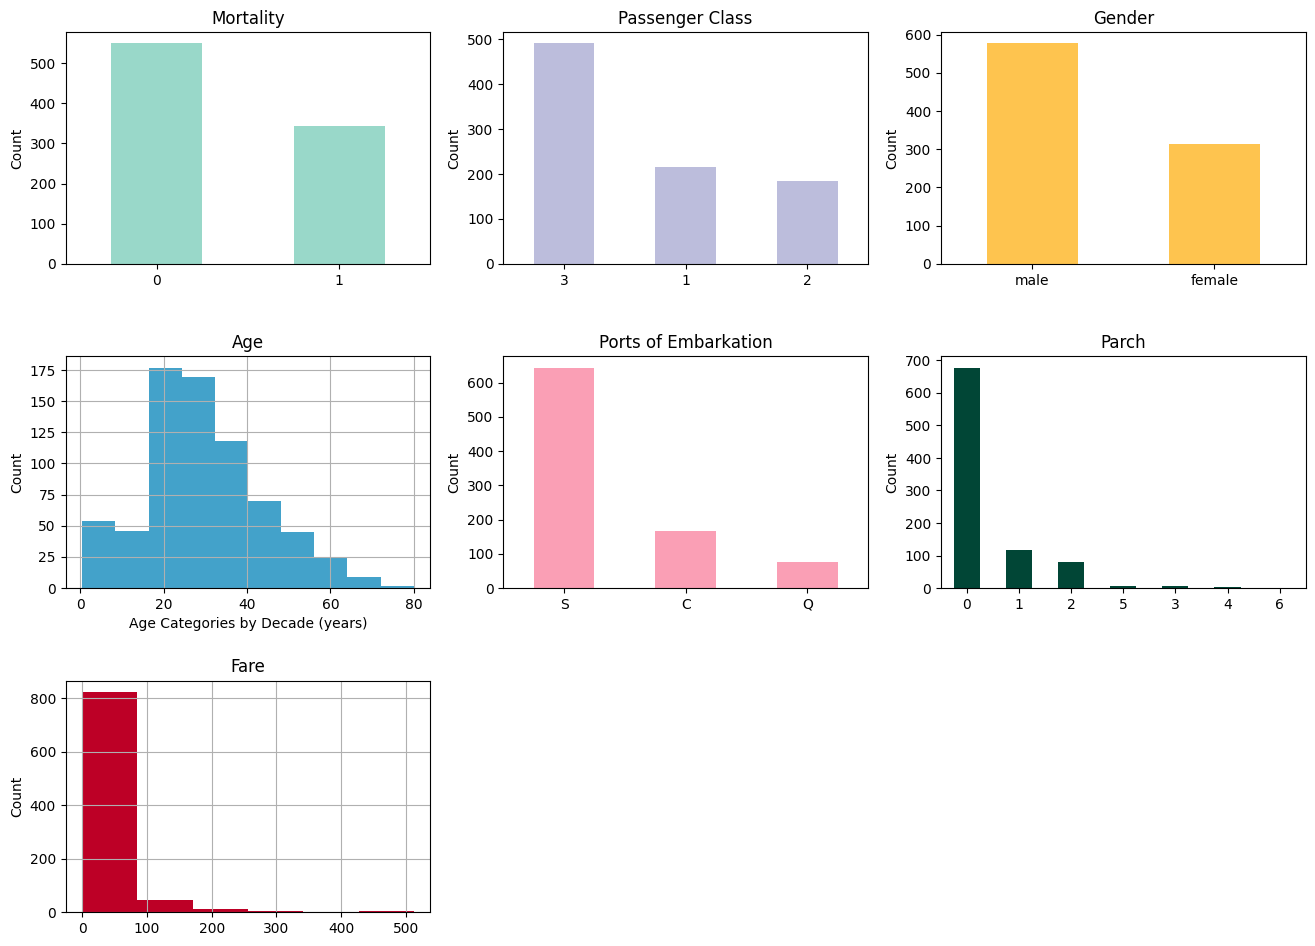

In [ ]:
# Mostramos algunos plots generales
# Figure size
plt.rc('figure', figsize=(16, 11))
# Histogram bin size
bin_size = 10

# Setup a figue of plots
#fig = plt.figure()
fig_size = (3, 3)

# Plot mortality counts
plt.subplot2grid(fig_size, (0, 0))
df_titanic['Survived'].value_counts().plot(kind='bar', title='Mortality', color="#99d8c9")
plt.xticks(rotation=0)
plt.ylabel('Count')
print(f"Sobrevivientes: {df_titanic['Survived'].value_counts()/len(df_titanic['Survived'])*100}")

# Plot Pclass counts
plt.subplot2grid(fig_size, (0, 1))
df_titanic['Pclass'].value_counts().plot(kind='bar', title='Passenger Class',color="#bcbddc")
plt.xticks(rotation=0)
plt.ylabel('Count')
print(f"Clases: {df_titanic['Pclass'].value_counts()/len(df_titanic['Pclass'])*100}")
# Plot Gender counts
plt.subplot2grid(fig_size, (0, 2))
df_titanic['Sex'].value_counts().plot(kind='bar', title='Gender',color="#fec44f")
plt.xticks(rotation=0)
plt.ylabel('Count')
print(f"Genero: {df_titanic['Sex'].value_counts()/len(df_titanic['Sex'])*100}")
# Plot Age histogram
plt.subplot2grid(fig_size, (1, 0))
#df_titanic['Age'].value_counts().plot(kind='bar', title='Age',color="#43a2ca")
df_titanic['Age'].hist(color="#43a2ca")
plt.title('Age')
plt.ylabel('Count')
plt.xlabel('Age Categories by Decade (years)')

# Plot Port counts
plt.subplot2grid(fig_size, (1, 1))
df_titanic['Embarked'].value_counts().plot(kind='bar', title='Ports of Embarkation',color="#fa9fb5")
plt.xticks(rotation=0)
plt.ylabel('Count')
print(f"Embarked: {df_titanic['Embarked'].value_counts()/len(df_titanic['Embarked'])*100}")

# Plot Port counts
plt.subplot2grid(fig_size, (1,2 ))
df_titanic['Parch'].value_counts().plot(kind='bar', title='Parch',color="#014636")
plt.xticks(rotation=0)
plt.ylabel('Count')

# Plot Port counts
plt.subplot2grid(fig_size, (2,0))
df_titanic['Fare'].hist(color="#bd0026", bins=6)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Fare')
# Plot Port counts


plt.subplots_adjust(left=0.125,
            bottom=0.1,
            right=0.9,
            top=0.9,
            wspace=0.2,
            hspace=0.4)

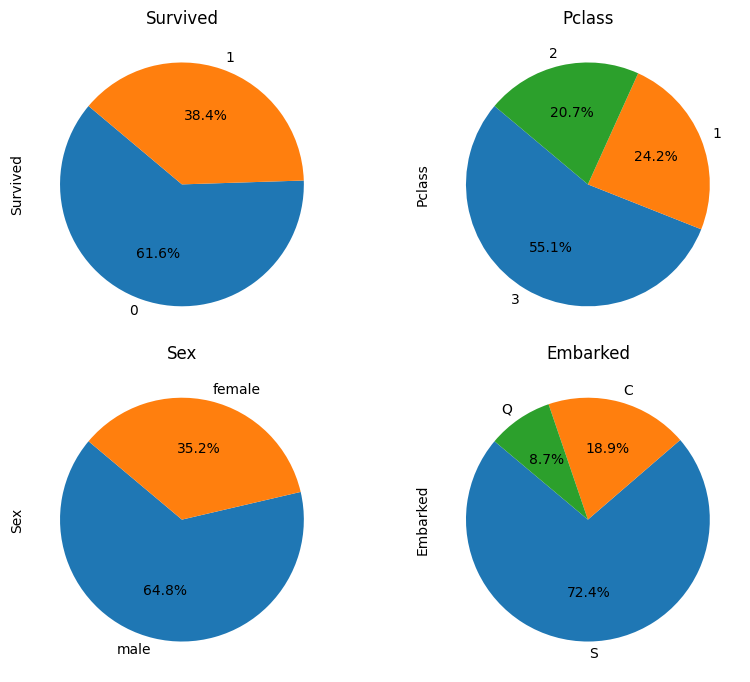

In [ ]:

# Mostramos algunos plots generales
# Figure size
plt.rc('figure', figsize=(10, 8))
# Histogram bin size
bin_size = 10

# Setup a figue of plots
#fig = plt.figure()
fig_size = (2, 2)

# Plot mortality counts
plt.subplot2grid(fig_size, (0, 0))
df_titanic['Survived'].value_counts().plot(kind='pie',labels=df_titanic['Survived'].value_counts().index,autopct="%1.1f%%",startangle=140)
plt.xticks(rotation=0)
plt.title("Survived")


# Plot Pclass counts
plt.subplot2grid(fig_size, (0, 1))
df_titanic['Pclass'].value_counts().plot(kind='pie',labels=df_titanic['Pclass'].value_counts().index,autopct="%1.1f%%",startangle=140)
plt.xticks(rotation=0)
plt.title("Pclass")


# Plot Gender counts
plt.subplot2grid(fig_size, (1, 0))
df_titanic['Sex'].value_counts().plot(kind='pie',labels=df_titanic['Sex'].value_counts().index,autopct="%1.1f%%",startangle=140)
plt.xticks(rotation=0)
plt.title("Sex")



# Plot Port counts
plt.subplot2grid(fig_size, (1, 1))
df_titanic['Embarked'].value_counts().plot(kind='pie',labels=df_titanic['Embarked'].value_counts().index,autopct="%1.1f%%",startangle=140)
plt.title("Embarked")
plt.xticks(rotation=0)


plt.subplots_adjust(left=0.125,
            bottom=0.1,
            right=0.9,
            top=0.9,
            wspace=0.1,
            hspace=0.1)

*   Figura 1 vemos la cantidad de personas que murieron vs las que sobrevivieron, por lo que vemos que el porcentaje de sobrevivientes es menor (38.4).
*   En la Fig 2 vemos que en el barco habia mas personas de de la 3era (55%), mientras que la primera clase (20%) y segunda (24) poseen valores similares

*   En la Fig 3 se observa que existe unmayor porcentaje de hombres (65%) que de mujeres (35%)
*   En la Fig. 4 nos brinda informacion sobre la edad de las personas que abordaron el barco. Vemos que habia personas de todas las edades, desde bebes (0-1) hasta 80 años. Sin embargo, se puede deducir que la mayoria eran jovenes se encuentra entre 18 y 30 años aproximadamente. A su vez, vemos que habia un numero mayor de niños pequeños que de aultos mayores.

*   La Fig 5 muestra los 3 puertos por los cuales han subido los pasajeros. Vemos que el puerto S ( S = Southampton) es aquel por el cual han subido mas personas (72%), seguido de C = Cherbourg, Q = Queenstown. Posiblemente el puerto S corresponde al puerto donde han subido aquellas personas de la tercera clase debido a que tienen la misma/similar magnitud. Mientras que los otros puertos han sido dividido por las clases restantes.
*  La Fig 6 corresponde al numero de padres/hijos a bordo del Titanic. por lo que podemos ver es que la mayoria han viajado solos, sin ningun familiar. Si lo vinculamos con la edad y el genero una primera conclusion podria ser que la mayoria son hombres jovenes solos y son de 3era clase.

*   La Fig 7 corresponde a fare, costo del boleto. Vemos que esta dividido en 6 bins, siendo el primero donde se encuentran los mayores numero de boletos vendidos. Po lo que el valor del boleto en general fue menor a 100$, que coincide con aquellos de 3era clase. Incluso existen boletos con un costo de 500 que serian los de primera clase.



De 577 hombres que habia en el barco, sobrevivieron 64, mientras que 513 han fallecido. Es decir que 88.91 % de los hombres murio
De 314 mujeres que habia en el barco, sobrevivieron 274, mientras que 32 han fallecido. Es decir que 10.19 % de los mujeres murio


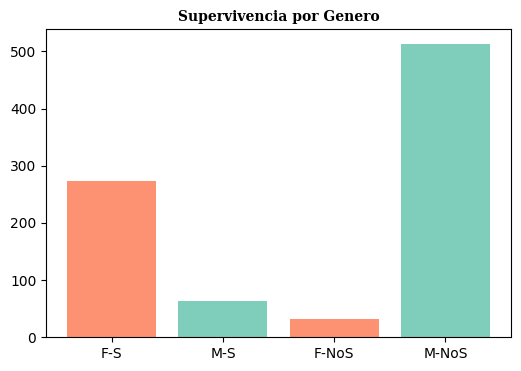

In [ ]:
# Sobrevivientes por genero
#Cuentos sobrevivientes-no Sobrevivientes por genero hay
plt.rc('figure', figsize=(6, 4))
mujeresSobrevivientes = (df_titanic.Survived[df_titanic.Survived == 1].count())&(df_titanic.Sex[df_titanic.Sex == "female"].count())
hombresSobrevivientes = (df_titanic.Survived[df_titanic.Survived == 1].count())&(df_titanic.Sex[df_titanic.Sex == "male"].count())
mujeresNoSobrevivientes = (df_titanic.Survived[df_titanic.Survived == 0].count())&(df_titanic.Sex[df_titanic.Sex == "female"].count())
hombresNoSobrevivientes = (df_titanic.Survived[df_titanic.Survived == 0].count())&(df_titanic.Sex[df_titanic.Sex == "male"].count())
plt.bar(["F-S","M-S","F-NoS","M-NoS"], [mujeresSobrevivientes,hombresSobrevivientes,mujeresNoSobrevivientes,hombresNoSobrevivientes],color=["#fc9272","#7fcdbb","#fc9272","#7fcdbb"])
plt.title("Supervivencia por Genero",fontsize=10,fontdict={'family': 'serif', 'color' : 'Black', 'weight': 'bold', 'size': 10})
print(f'De {(df_titanic.Sex[df_titanic.Sex == "male"].count())} hombres que habia en el barco, sobrevivieron {hombresSobrevivientes}, mientras que {hombresNoSobrevivientes} han fallecido. Es decir que {round(hombresNoSobrevivientes/(df_titanic.Sex[df_titanic.Sex == "male"].count())*100,2)} % de los hombres murio')
print(f'De {(df_titanic.Sex[df_titanic.Sex == "female"].count())} mujeres que habia en el barco, sobrevivieron {mujeresSobrevivientes}, mientras que {mujeresNoSobrevivientes} han fallecido. Es decir que {round(mujeresNoSobrevivientes/(df_titanic.Sex[df_titanic.Sex == "female"].count())*100,2)} % de los mujeres murio')
plt.show()

En la figura anterior podemos observar en color verde los datos de hombres mientras que en naranja los valores corresponden a mujeres. Mientras que "S" corresponde a supervivientes y "NoS" a no sobreviviente.
Si bien el numero de mujeres es mas alto que el de hombres, vemos que han fallecido muchos mas hombres (88.91%) que mujeres (10.19%). Las mujeres tuvieron una alta tasa de supervivencia (89.81%)

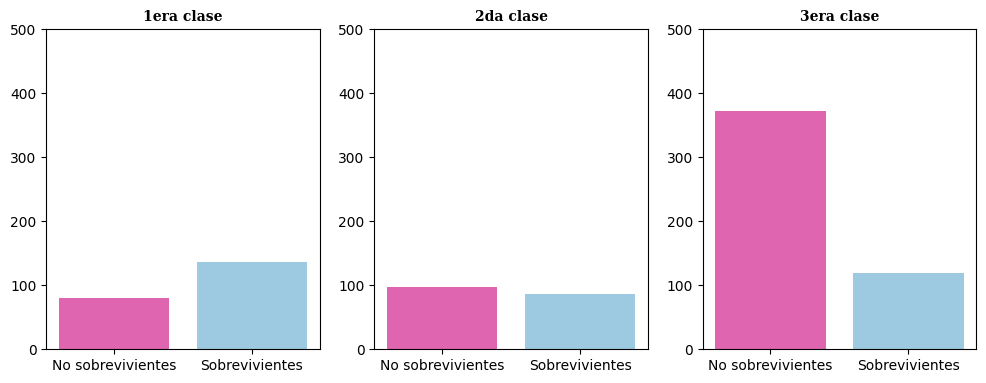

In [ ]:

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(12,4))

#por clases
class1Sobreviviente = df_titanic.Survived[(df_titanic.Survived == 1)&(df_titanic.Pclass == 1)].count()
class1NoSobreviviente = df_titanic.Survived[(df_titanic.Survived == 0)&(df_titanic.Pclass == 1)].count()
#print(f"En la 1era clase sobrevivieron {class1Sobreviviente}, mientras que {class1NoSobreviviente} no tuvieron la misma suerte. Es decir que sobrevivio el {round(class1Sobreviviente/(class1NoSobreviviente+class1Sobreviviente)*100,2)}%")
#2da
class2Sobreviviente = df_titanic.Survived[(df_titanic.Survived == 1)&(df_titanic.Pclass == 2)].count()
class2NoSobreviviente = df_titanic.Survived[(df_titanic.Survived == 0)&(df_titanic.Pclass == 2)].count()
#print(f"En la 2da clase sobrevivieron {class2Sobreviviente}, mientras que {class2NoSobreviviente} no tuvieron la misma suerte. Es decir que solo sobrevivio el {round(class2Sobreviviente/(class2NoSobreviviente+class2Sobreviviente)*100,2)}%")

#3era
class3Sobreviviente = df_titanic.Survived[(df_titanic.Survived == 1)&(df_titanic.Pclass == 3)].count()
class3NoSobreviviente = df_titanic.Survived[(df_titanic.Survived == 0)&(df_titanic.Pclass == 3)].count()
#print(f"En la 3era clase sobrevivieron {class3Sobreviviente}, mientras que {class3NoSobreviviente} no tuvieron la misma suerte. Es decir que solo sobrevivio el {round(class3Sobreviviente/(class3NoSobreviviente+class3Sobreviviente)*100,2)}%")
ax[0].bar(['No sobrevivientes', 'Sobrevivientes'], [class1NoSobreviviente,class1Sobreviviente], color=["#df65b0","#9ecae1"])
ax[1].bar(['No sobrevivientes', 'Sobrevivientes'], [class2NoSobreviviente,class2Sobreviviente], color=["#df65b0","#9ecae1"])
ax[2].bar(['No sobrevivientes', 'Sobrevivientes'], [class3NoSobreviviente,class3Sobreviviente], color=["#df65b0","#9ecae1"])

#titulos
ax[0].set_title('1era clase',fontsize=10,fontdict={'family': 'serif', 'color' : 'Black', 'weight': 'bold', 'size': 10})
ax[1].set_title('2da clase',fontsize=10,fontdict={'family': 'serif', 'color' : 'Black', 'weight': 'bold', 'size': 10})
ax[2].set_title('3era clase',fontsize=10,fontdict={'family': 'serif', 'color' : 'Black', 'weight': 'bold', 'size': 10})


# Configuration of subplots
plt.subplots_adjust(left=0.125,
            bottom=0.1,
            right=0.9,
            top=0.9,
            wspace=0.2,
            hspace=0.4)


ax[0].yaxis.set_ticks(np.arange(0, 510, 100))
ax[1].yaxis.set_ticks(np.arange(0, 510, 100))
ax[2].yaxis.set_ticks(np.arange(0, 510, 100))

plt.show()


En la 1era clase sobrevivieron 136, mientras que 80 no tuvieron la misma suerte. Es decir que sobrevivio el 62.96%
En la 2da clase sobrevivieron 87, mientras que 97 no tuvieron la misma suerte. Es decir que solo sobrevivio el 47.28%
En la 3era clase sobrevivieron 119, mientras que 372 no tuvieron la misma suerte. Es decir que solo sobrevivio el 24.24%.
En otras palabras podriamos decir que el mayor porcentaje de muertes son de la 3era clase

# Figura de correlacion

<ipython-input-185-eb862a5a9b89>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_titanic.corr()


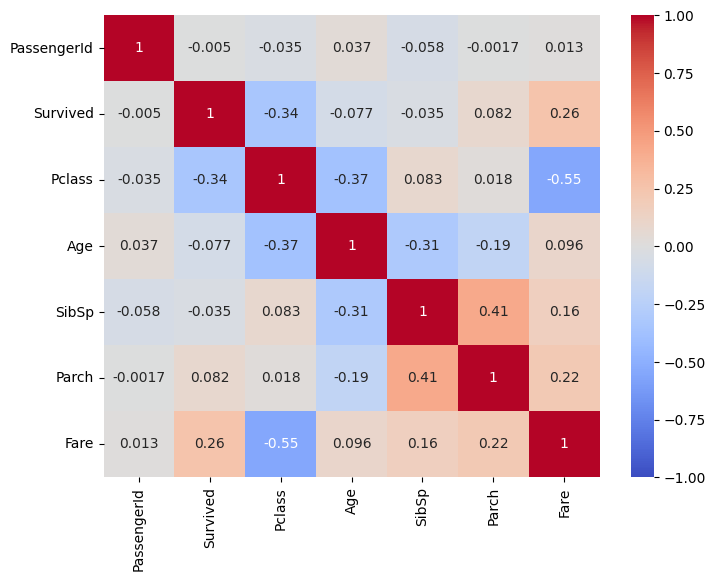

In [ ]:
#Plot de correlacion cpn seaborn
corr = df_titanic.corr()
fig,ax=plt.subplots(1,1,figsize=(8,6))
ax = sns.heatmap(corr,  vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')


En la figura anterior vemos un plot de correlacion de las variables. Segun los resultados vemos que existe una correlacion entre baja-moderada entre las variables. Muchas de estas no significativas ya que posee un r muy bajo. Mientras que otras son correlaciones negativas.

*  Vemos que la mayor correlacion es negativa, es decir una relacion inversa entre *Pclass y Fare* con un coeficiente de pearson r = -0.55. Esto quiere decir que a mayor numero de la clase (3era clase), el valor del boleto es menor. Esta es una correlacion moderada
*   La segunda correlacion mas importante es entre *Parch *la cual corresponde al numero de padres/hijos a bordo del Titanic y *SibSp* que define las relaciones familiares, particularmente corresponde a número de hermanos/cónyuges. Vemos que existe una correspondencia moderada positiva (0.41). Esto podria mostrar que existen familias entereas en el barco



#Dataset Iris

El dataset Iris es un conjunto de datos de clasificación multiclase clásico y muy sencillo. Introducido por el estadístico y biólogo británico Ronald Fisher en su artículo de 1936 "The use of multiple measurements in taxonomic problems". El conjunto de datos de Iris contiene cuatro características (longitud y anchura de sépalos y pétalos) de 50 muestras de tres especies de flores Iris (Iris setosa, Iris virginica e Iris versicolor)
(https://www.kaggle.com/code/joeportilla/analisis-exploratorio-de-datos-dataset-iris)

In [4]:
#librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
#Configurar  google drive


In [5]:
# Abrimos archivo desde la libreria de seaborn
data_iris = sns.load_dataset("iris")
# Visualizamos los primeros datos
print(f'Las columnas de este dataset son: {data_iris.columns}')
print(" ---------------     Primeras filas del dataset         ------------------")
data_iris.head()

Las columnas de este dataset son: Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
 ---------------     Primeras filas del dataset         ------------------


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Con sta funcion vemos el tipo de dato que corresponde a cada columna, asi como tambien podemos ver si posee datos nulos
data_iris.info()
#Tipo de variables
print(data_iris.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [ ]:
# Estadisticas de las variables numericas del dataset. A diferencia del dataset anterior aca visualizamos todas las variables ya que son numericas salvo el nombre de la especie "Species "
#porque
data_iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000



*   Vemos que tiene un count de 150 en las 5 variables por lo que podriamos pensar que no tiene valores ausentes
*   *SepalLengthCm*: Vemos que la longitud del sepalo tiene una media de 5.8 y una desviacion estandar de 0.82. Lo que nos demuestra que existe una baja variabilidad/dispersion de los datos, posiblemente no hay outliers significativos. Esto se debe a que la sd esta muy por debajo de la media. En cuanto a los cuartiles, son muy similares a la media, por lo que se podria concluir que estan concentrados en esa medida.  Ademas, podrian indicar que la distribución podría estar ligeramente sesgada hacia la izquierda, es decir que hay una concentración de datos en el extremo inferior de la distribución.

*   *SepalWidthCm*: en cuanto al ancho del sepalo tiene una media de 3.0 y una desviacion estandar de 0.4. Lo que nos demuestra que existe una baja variabilidad/dispersion de los datos, posiblemente no hay outliers significativos. Esto se debe a que la sd esta muy por debajo de la media. En cuanto a los cuartiles, son muy similares a la media, por lo que se podria concluir que estan concentrados en esa medida. La media esta entre el cuartil 50y 75. Los valores de los cuartiles indican que la distribución parece ser cercana a una distribución simétrica o ligeramente sesgada hacia la derecha, pero el sesgo no parece ser muy significativo

*   *PetalLengthCm*: en cuanto a la longitud del petalo vemos que tiene una media de 3.75cm y una desviacion estandar de 1.77. Esta presenta una mayor sd con respecto al resto de las variables. Si bien es mas alta, continua estando alejada del valor medio. Lo que nos demuestra que existe una baja variabilidad/dispersion de los datos, posiblemente no hay outliers significativos. Pero una mayor variabilidad que las variables anteriores.  En cuanto a los cuartiles vemos que el cuartile 50 y 75 presentan valores mas cercanos mientras que el 25 esta mas alejado. Debido a que la mediana (Q2) está más cerca de Q3 que de Q1 (4.35 está más cerca de 5.10 que de 1.6). Por lo tanto, pareceria que los datos estan sesgados hacia la derecha (positivamente sesgada). Esto sugiere que la mayoría de los valores se encuentran en el extremo izquierdo de la distribución, con valores más altos siendo menos frecuentes.


*   *PetalWidthCm*: en cuanto al ancho del petalo vemos que tiene una media de 1.2cm y una desviacion estandar de 0.7. Lo que nos demuestra que existe una baja-moderada variabilidad/dispersion de los datos, posiblemente no hay outliers significativos. Esto se debe a que la sd esta  por debajo de la media. En cuanto a los cuartiles, son muy similares a la media, por lo que se podria concluir que estan concentrados en esa medida.  Ademas, podrian indicar que la distribución podría estar ligeramente sesgada hacia la izquierda, es decir que hay una concentración de datos en el extremo inferior de la distribución.

La variable *Species* no es condierada ya que no es numerica



In [ ]:
#Valores de cada variable
# Todos tienen 150 valores
data_iris.count()
data_iris.shape

Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

## 2. Explicación del dataset y sus diferentes variables.

Con estas funciones podemos ver que este dataset posee 6 columnas:
Segun la documentacion las variables significan:

*   Id corresponde a una variable numerica continua ya que se trataria de un ID. Que comienza en el 1 hasta el 150
*   SepalLengthCm: Mide la longitud del sépalo, la parte verde externa de la flor, en centímetros. Es un valor numerico continuo, de tipo float
*   SepalWidthCm: Mide la anchura del sépalo en centímetros. Es un valor numerico continuo, de tipo float
*   PetalLengthCm: Mide la longitud del pétalo, la parte coloreada de la flor, en centímetros. Es un valor numerico continuo, de tipo float
*   PetalWidthCm: Mide la anchura del pétalo en centímetros. Es un valor numerico continuo, de tipo float
*   Species: indica a qué especie de iris pertenece la flor. Esta es una variable catetorica nominal, ya que puede adquirir 3 posibles valores en formato string (setosa, versicolor o virginica)








### 4- Detectar y arreglar los siguientes coceptos:
* Valores Ausente
* Valores Atipicos


# A. Valores ausentes

In [6]:
# Mostramos cuantos valores hay en cada variable
valoresNull_iris=data_iris.isnull().sum()
print("----------    valores ausentes - nulos    ----------")
print(valoresNull_iris)

valoresNull_iris= round((data_iris.isnull().sum()/len(data_iris))*100,2)
print("----------    Porcentaje de valores ausentes - nulos por variable    ----------")
print(valoresNull_iris)

----------    valores ausentes - nulos    ----------
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
----------    Porcentaje de valores ausentes - nulos por variable    ----------
Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64


Vemos que este dataset no tiene valores nulos. Por lo que no es necesario hacer un analisis aparte para ser reemplazados o eliminados del dataset

#B. Valores atipicos

Limite inferior 3.15 y Limite superior 8.35
El minimo es 4.3 mientras que el maximo es 7.9


<Axes: title={'center': 'Boxplot variable SepalLengthCm'}, xlabel=' ', ylabel='SepalLengthCm'>

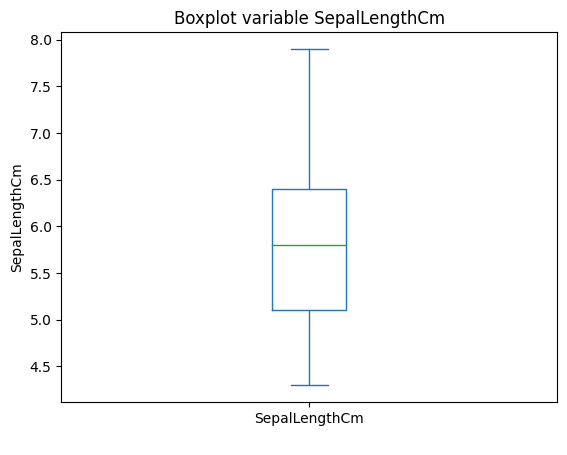

In [9]:
# Valores atipicos a traves del rango intercuartil.
# A partir del primer y tercer cuartil definimos los limites de los valores atipicos, por debajo y por encima de estos limites
# Rango intercuartil
irq_SepalLength = data_iris['SepalLengthCm'].quantile(0.75) - data_iris['SepalLengthCm'].quantile(0.25)
#definimos limites
lower_bound_SepalLength = data_iris['SepalLengthCm'].quantile(0.25) - 1.5 * irq_SepalLength
upper_bound_SepalLength = data_iris['SepalLengthCm'].quantile(0.75) + 1.5 * irq_SepalLength

#Identificamos valores atipicos de "SepalLength"
outliers_SepalLength = data_iris[(data_iris['SepalLengthCm']<lower_bound_SepalLength) | (data_iris['SepalLengthCm']> upper_bound_SepalLength)]

#Print valores atipicos
print(f'Limite inferior {round(lower_bound_SepalLength,2)} y Limite superior {round(upper_bound_SepalLength,2)}')
print(f"El minimo es {data_iris['SepalLengthCm'].min()} mientras que el maximo es {data_iris['SepalLengthCm'].max()}")
# Datos atipicos. Una forma de verlos es a traves de boxplots el cual muestra cla mediana, el rango intercuartil y los valores atípicos (outliers)
data_iris['SepalLengthCm'].plot.box(title="Boxplot variable SepalLengthCm",xlabel=" ",ylabel="SepalLengthCm")


En este boxplot de ***SepalLengthCm*** vemos que no hay outliers, donde muestra límite inferior de 3.15, un límite superior de 8.35, un valor mínimo de 4.3 y un valor máximo de 7.9. Como el limite superior es mayor al valor maximo vemos que no hay outliers, que todos los datos estan concentrados

Limite inferior 2.05 y Limite superior 4.05
El minimo es 2.0 mientras que el maximo es 4.4


<Axes: title={'center': 'Boxplot variable SepalWidthCm'}, xlabel=' ', ylabel='SepalWidthCm'>

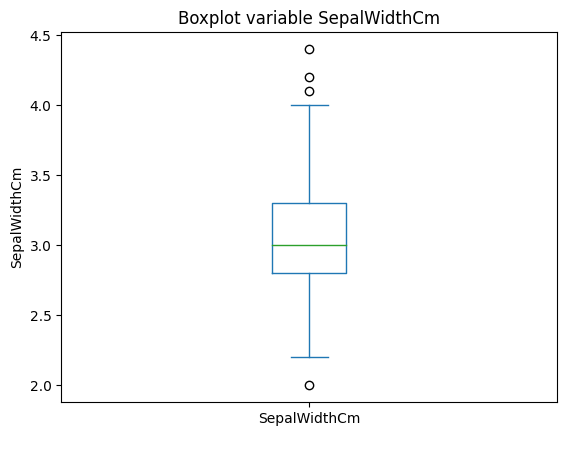

In [14]:
# Valores atipicos a traves del rango intercuartil.
# A partir del primer y tercer cuartil definimos los limites de los valores atipicos, por debajo y por encima de estos limites
# Rango intercuartil
irq_SepalWidthCm = data_iris['SepalWidthCm'].quantile(0.75) - data_iris['SepalWidthCm'].quantile(0.25)
#definimos limites
lower_bound_SepalWidthCm = data_iris['SepalWidthCm'].quantile(0.25) - 1.5 * irq_SepalWidthCm
upper_bound_SepalWidthCm = data_iris['SepalWidthCm'].quantile(0.75) + 1.5 * irq_SepalWidthCm

#Identificamos valores atipicos de "SepalWidthCm"
outliers_SepalWidthCm = data_iris[(data_iris['SepalWidthCm']<lower_bound_SepalWidthCm) | (data_iris['SepalWidthCm']> upper_bound_SepalWidthCm)]

#Print valores atipicos
print(f'Limite inferior {round(lower_bound_SepalWidthCm,2)} y Limite superior {round(upper_bound_SepalWidthCm,2)}')
print(f"El minimo es {data_iris['SepalWidthCm'].min()} mientras que el maximo es {data_iris['SepalWidthCm'].max()}")
# Datos atipicos. Una forma de verlos es a traves de boxplots el cual muestra cla mediana, el rango intercuartil y los valores atípicos (outliers)
data_iris['SepalWidthCm'].plot.box(title="Boxplot variable SepalWidthCm",xlabel=" ",ylabel="SepalWidthCm")

En este boxplot de ***SepalWidthCm*** vemos que a diferencia del plot anterior si hay outliers. Donde el limite inferior 2.05 y limite superior 4.04, mientras que el minimo es 2.0 y que el maximo es 4.4 por lo que estan fuera de los limites. Sin embargo, esto son solo 4 valores, se deberia hacer otro tipo de analisis para ver si nos traeran problemas a la hora de trabajar con el dataset. En cuanto al rango vemos que los valores estan concentrados en 2 unidades

Limite inferior -1.95 y Limite superior 4.05
El minimo es 0.1 mientras que el maximo es 2.5


<Axes: title={'center': 'Boxplot variable PetalWidthCm'}, xlabel=' ', ylabel='PetalWidthCm'>

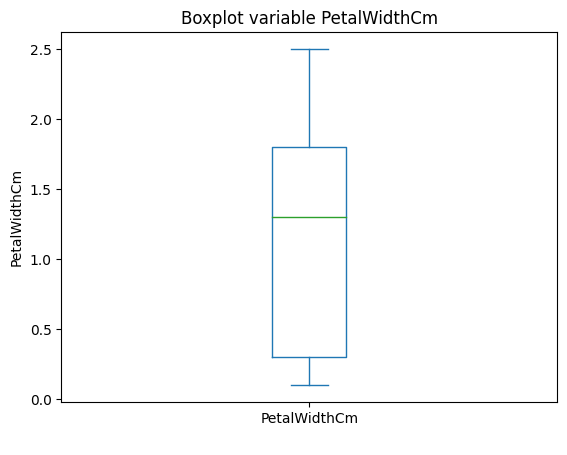

In [44]:
# Valores atipicos a traves del rango intercuartil.
# A partir del primer y tercer cuartil definimos los limites de los valores atipicos, por debajo y por encima de estos limites
# Rango intercuartil
irq_PetalWidthCm = data_iris['PetalWidthCm'].quantile(0.75) - data_iris['PetalWidthCm'].quantile(0.25)
#definimos limites
lower_bound_PetalWidthCm= data_iris['PetalWidthCm'].quantile(0.25) - 1.5 * irq_PetalWidthCm
upper_bound_PetalWidthCm= data_iris['PetalWidthCm'].quantile(0.75) + 1.5 * irq_PetalWidthCm

#Identificamos valores atipicos de "PetalWidthCm"
outliers_PetalWidthCm = data_iris[(data_iris['PetalWidthCm']<lower_bound_PetalWidthCm) | (data_iris['PetalWidthCm']> upper_bound_PetalWidthCm)]

#Print valores atipicos
print(f'Limite inferior {round(lower_bound_PetalWidthCm,2)} y Limite superior {round(upper_bound_PetalWidthCm,2)}')
print(f"El minimo es {data_iris['PetalWidthCm'].min()} mientras que el maximo es {data_iris['PetalWidthCm'].max()}")
# Datos atipicos. Una forma de verlos es a traves de boxplots el cual muestra cla mediana, el rango intercuartil y los valores atípicos (outliers)
data_iris['PetalWidthCm'].plot.box(title="Boxplot variable PetalWidthCm",xlabel=" ",ylabel="PetalWidthCm")

Limite inferior -3.65 y Limite superior 10.35
El minimo es 1.0 mientras que el maximo es 6.9


<Axes: title={'center': 'Boxplot variable PetalLengthCm'}, xlabel=' ', ylabel='PetalLengthCm'>

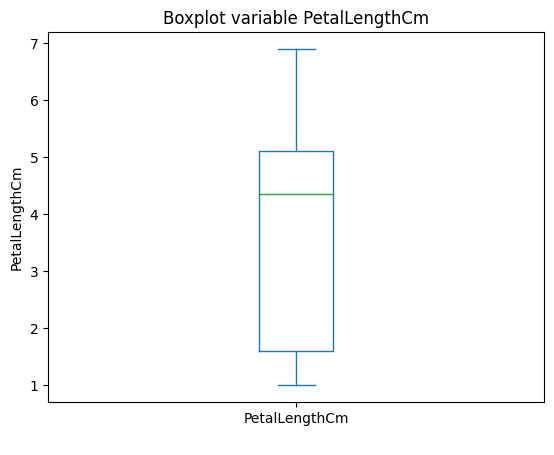

In [15]:
# Valores atipicos a traves del rango intercuartil.
# A partir del primer y tercer cuartil definimos los limites de los valores atipicos, por debajo y por encima de estos limites
# Rango intercuartil
irq_PetalLengthCm = data_iris['PetalLengthCm'].quantile(0.75) - data_iris['PetalLengthCm'].quantile(0.25)
#definimos limites
lower_bound_PetalLengthCm = data_iris['PetalLengthCm'].quantile(0.25) - 1.5 * irq_PetalLengthCm
upper_bound_PetalLengthCm = data_iris['PetalLengthCm'].quantile(0.75) + 1.5 * irq_PetalLengthCm

#Identificamos valores atipicos de "PetalLengthCm"
outliers_PetalLengthCm = data_iris[(data_iris['PetalLengthCm']<lower_bound_PetalLengthCm) | (data_iris['PetalLengthCm']> upper_bound_PetalLengthCm)]

#Print valores atipicos
print(f'Limite inferior {round(lower_bound_PetalLengthCm,2)} y Limite superior {round(upper_bound_PetalLengthCm,2)}')
print(f"El minimo es {data_iris['PetalLengthCm'].min()} mientras que el maximo es {data_iris['PetalLengthCm'].max()}")
# Datos atipicos. Una forma de verlos es a traves de boxplots el cual muestra cla mediana, el rango intercuartil y los valores atípicos (outliers)
data_iris['PetalLengthCm'].plot.box(title="Boxplot variable PetalLengthCm",xlabel=" ",ylabel="PetalLengthCm")

En este boxplot de ***PetalLengthCm*** vemos que no hay outliers, donde muestra un limite inferior -3.65 y limite superior 10.35
El minimo es 1.0 mientras que el maximo es 6.9 Como el limite superior es mayor al valor maximo vemos que no hay outliers, que todos los datos estan concentrados. Vemos que el rango es mas amplio a diferencia de las demas variables

6- Realizar analisis univariados



*   Grafico de frecuencia
*   Grafico de torta
*   Histograma


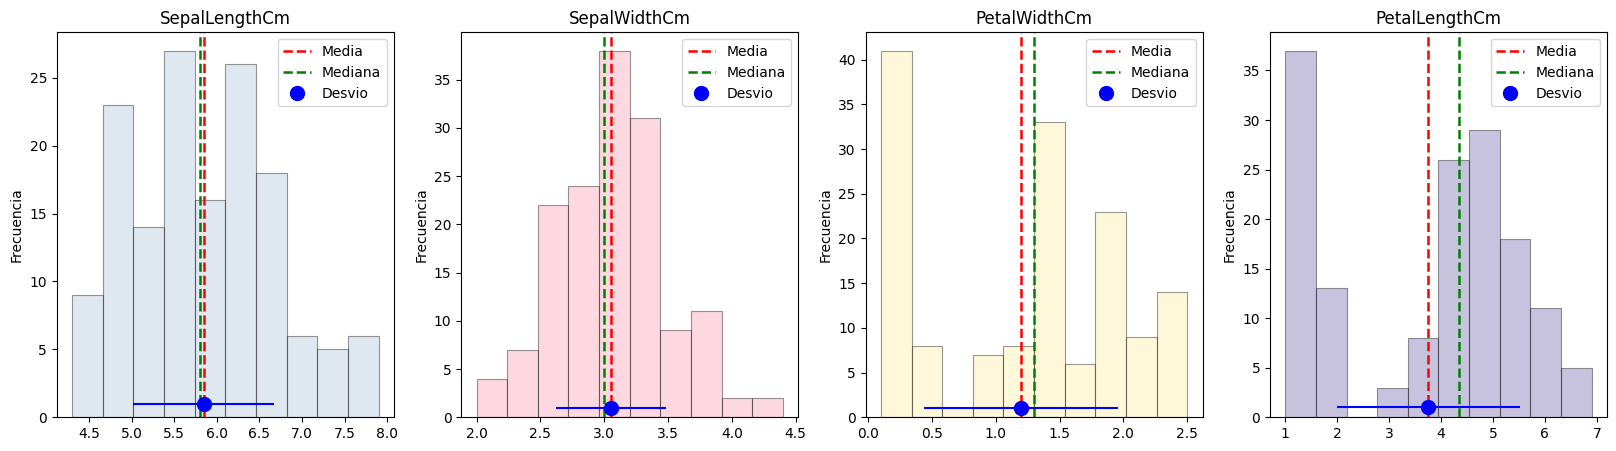

In [48]:
# Datos para los plots
mean_SepalLengthCm = np.mean(data_iris["SepalLengthCm"])
median_SepalLengthCm = np.median(data_iris["SepalLengthCm"])
sd_SepalLengthCm = np.std(data_iris["SepalLengthCm"])

mean_SepalWidthCm = np.mean(data_iris["SepalWidthCm"])
median_SepalWidthCm = np.median(data_iris["SepalWidthCm"])
sd_SepalWidthCm = np.std(data_iris["SepalWidthCm"])

mean_PetalWidthCm = np.mean(data_iris["PetalWidthCm"])
median_PetalWidthCm = np.median(data_iris["PetalWidthCm"])
sd_PetalWidthCm= np.std(data_iris["PetalWidthCm"])



mean_PetalLengthCm = np.mean(data_iris["PetalLengthCm"])
median_PetalLengthCm = np.median(data_iris["PetalLengthCm"])
sd_PetalLengthCm= np.std(data_iris["PetalLengthCm"])


# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
ax[0].hist(data_iris["SepalLengthCm"],color = "lightsteelblue",alpha=0.4, edgecolor = 'black',  linewidth=0.8)
ax[0].axvline(mean_SepalLengthCm,  color='red', linestyle='dashed',linewidth= 1.8, label= 'Media')
ax[0].axvline(median_SepalLengthCm,  color='green', linestyle='dashed',linewidth= 1.8, label= 'Mediana')
ax[0].errorbar(mean_SepalLengthCm,1,xerr=sd_SepalLengthCm,color='blue',fmt='o',markersize=10,label='Desvio')

#2do plot
ax[1].hist(data_iris["SepalWidthCm"],color = "#fa9fb5",alpha=0.4, edgecolor = 'black',  linewidth=0.8)
ax[1].axvline(mean_SepalWidthCm,  color='red', linestyle='dashed',linewidth= 1.8, label= 'Media')
ax[1].axvline(median_SepalWidthCm,  color='green', linestyle='dashed',linewidth= 1.8, label= 'Mediana')
ax[1].errorbar(mean_SepalWidthCm,1,xerr=sd_SepalWidthCm,color='blue',fmt='o',markersize=10,label='Desvio')


#3ero plot
ax[2].hist(data_iris["PetalWidthCm"],color = "#ffeda0",alpha=0.4, edgecolor = 'black',  linewidth=0.8)
ax[2].axvline(mean_PetalWidthCm,  color='red', linestyle='dashed',linewidth= 1.8, label= 'Media')
ax[2].axvline(median_PetalWidthCm,  color='green', linestyle='dashed',linewidth= 1.8, label= 'Mediana')
ax[2].errorbar(mean_PetalWidthCm,1,xerr=sd_PetalWidthCm,color='blue',fmt='o',markersize=10,label='Desvio')


#4to plot
ax[3].hist(data_iris["PetalLengthCm"],color = "#756bb1",alpha=0.4, edgecolor = 'black',  linewidth=0.8)
ax[3].axvline(mean_PetalLengthCm,  color='red', linestyle='dashed',linewidth= 1.8, label= 'Media')
ax[3].axvline(median_PetalLengthCm,  color='green', linestyle='dashed',linewidth= 1.8, label= 'Mediana')
ax[3].errorbar(mean_PetalLengthCm,1,xerr=sd_PetalLengthCm,color='blue',fmt='o',markersize=10,label='Desvio')


# Titulo
ax[0].set_title('SepalLengthCm')
ax[1].set_title('SepalWidthCm')
ax[2].set_title('PetalWidthCm')
ax[3].set_title('SepalLengthCm')
# EJES
ax[0].set_ylabel('Frecuencia')
ax[1].set_ylabel('Frecuencia')
ax[2].set_ylabel('Frecuencia')
ax[3].set_ylabel('Frecuencia')


# Legenda
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()

En el plot anterior vemos un analisis de la variable ***SepalLengthCm*** donde nos muestra que en la longitud del sépalo la mayor frecuencia se presenta entre 5.5 cm y 6.5 cm, con una mediana de 5.8 cm. La distribución de los datos se acercan a una distribución normal.

 En cuanto a ***SepalWidthCm*** muestra que la mayor frecuencia se presenta entre 3cm y 3.5 cm, con una mediana de 3 cm. La distribución de los datos se acercan a una distribución normal. Esto muestra una distribución mucho más puntiaguda y con baja dispersión.

 Por el contrario ***PetalWidthCm*** y ***PetalLengthCm*** se ven mas dispersos los datos. Si bien la mayor frecuencia se da a valores menores en cada caso, el histograma se desplaza hacia la derecha en ambos casos. Poseen los mismos patrones.
Precisamente ***PetalLengthCm*** muestra que la mayor frecuencia se presenta en 1 cm, y además tiene una frecuencia alta alrededor de 4.5 cm. Esto genera una variabilidad no normal en su distribución.
Mientras que  ***PetalWidthCm*** vemos que la mayor frecuencia se presenta en 0.5 cm, y además tiene una frecuencia alta alrededor de 1.5 cm. Esto genera una variabilidad no normal en su distribución.

Text(0.5, 1.0, 'Species')

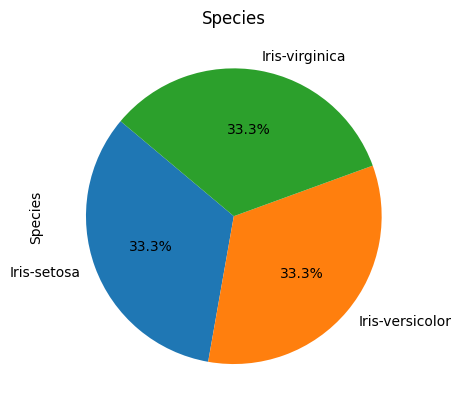

In [53]:
# Vemos un pie plot donde nos muestra que existe la misma cantidad de especies en el dataset
data_iris['Species'].value_counts().plot(kind='pie',labels=data_iris['Species'].value_counts().index,autopct="%1.1f%%",startangle=140)
plt.xticks(rotation=0)
plt.title("Species")


In [61]:
# Podemos hacer un analisis de las 4 variables segun la especie
# Para eso generamos un df para cada especie para una mejor
print(data_iris['Species'].unique())
data_iris_setosa = (data_iris[data_iris.Species == 'Iris-setosa'])
data_iris_versicolor = (data_iris[data_iris.Species == 'Iris-versicolor'])
data_iris_virginica = (data_iris[data_iris.Species == 'Iris-virginica'])


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


# Analisis de Iris Setosa


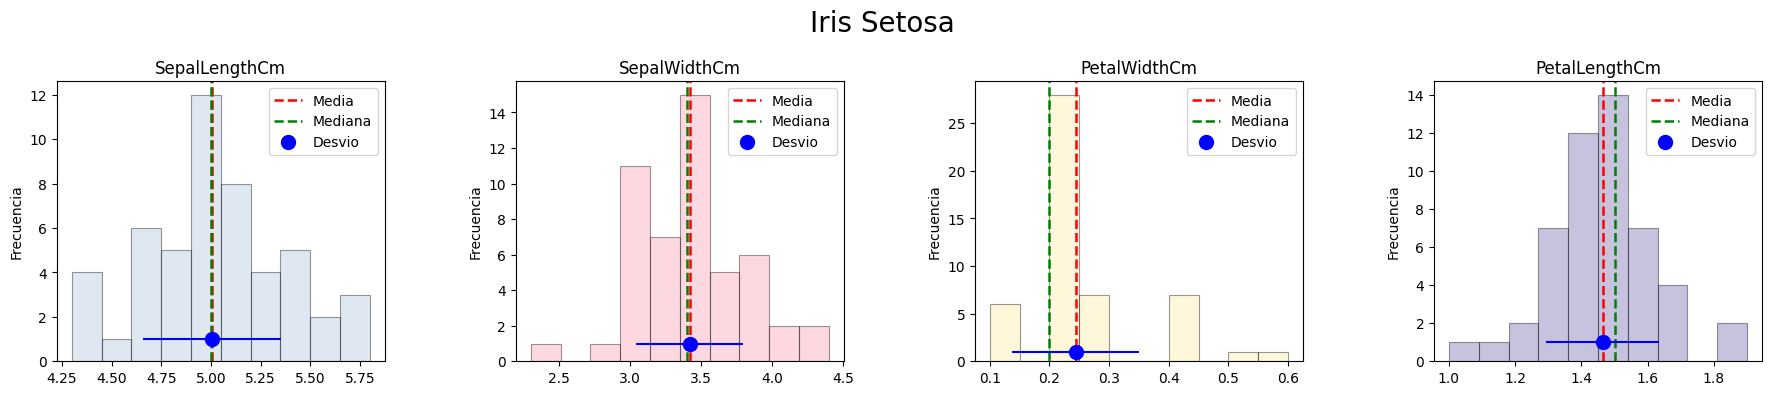

In [72]:
# Datos para los plots
mean_SepalLengthCm_setosa = np.mean(data_iris_setosa["SepalLengthCm"])
median_SepalLengthCm_setosa = np.median(data_iris_setosa["SepalLengthCm"])
sd_SepalLengthCm_setosa = np.std(data_iris_setosa["SepalLengthCm"])

mean_SepalWidthCm_setosa = np.mean(data_iris_setosa["SepalWidthCm"])
median_SepalWidthCm_setosa = np.median(data_iris_setosa["SepalWidthCm"])
sd_SepalWidthCm_setosa = np.std(data_iris_setosa["SepalWidthCm"])

mean_PetalWidthCm_setosa = np.mean(data_iris_setosa["PetalWidthCm"])
median_PetalWidthCm_setosa = np.median(data_iris_setosa["PetalWidthCm"])
sd_PetalWidthCm_setosa= np.std(data_iris_setosa["PetalWidthCm"])

mean_PetalLengthCm_setosa = np.mean(data_iris_setosa["PetalLengthCm"])
median_PetalLengthCm_setosa = np.median(data_iris_setosa["PetalLengthCm"])
sd_PetalLengthCm_setosa= np.std(data_iris_setosa["PetalLengthCm"])


# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(22, 4))
ax[0].hist(data_iris_setosa["SepalLengthCm"],color = "lightsteelblue",alpha=0.4, edgecolor = 'black',  linewidth=0.8)
ax[0].axvline(mean_SepalLengthCm_setosa,  color='red', linestyle='dashed',linewidth= 1.8, label= 'Media')
ax[0].axvline(median_SepalLengthCm_setosa,  color='green', linestyle='dashed',linewidth= 1.8, label= 'Mediana')
ax[0].errorbar(mean_SepalLengthCm_setosa,1,xerr=sd_SepalLengthCm_setosa,color='blue',fmt='o',markersize=10,label='Desvio')

#2do plot
ax[1].hist(data_iris_setosa["SepalWidthCm"],color = "#fa9fb5",alpha=0.4, edgecolor = 'black',  linewidth=0.8)
ax[1].axvline(mean_SepalWidthCm_setosa,  color='red', linestyle='dashed',linewidth= 1.8, label= 'Media')
ax[1].axvline(median_SepalWidthCm_setosa,  color='green', linestyle='dashed',linewidth= 1.8, label= 'Mediana')
ax[1].errorbar(mean_SepalWidthCm_setosa,1,xerr=sd_SepalWidthCm_setosa,color='blue',fmt='o',markersize=10,label='Desvio')


#3ero plot
ax[2].hist(data_iris_setosa["PetalWidthCm"],color = "#ffeda0",alpha=0.4, edgecolor = 'black',  linewidth=0.8)
ax[2].axvline(mean_PetalWidthCm_setosa,  color='red', linestyle='dashed',linewidth= 1.8, label= 'Media')
ax[2].axvline(median_PetalWidthCm_setosa,  color='green', linestyle='dashed',linewidth= 1.8, label= 'Mediana')
ax[2].errorbar(mean_PetalWidthCm_setosa,1,xerr=sd_PetalWidthCm_setosa,color='blue',fmt='o',markersize=10,label='Desvio')


#4to plot
ax[3].hist(data_iris_setosa["PetalLengthCm"],color = "#756bb1",alpha=0.4, edgecolor = 'black',  linewidth=0.8)
ax[3].axvline(mean_PetalLengthCm_setosa,  color='red', linestyle='dashed',linewidth= 1.8, label= 'Media')
ax[3].axvline(median_PetalLengthCm_setosa,  color='green', linestyle='dashed',linewidth= 1.8, label= 'Mediana')
ax[3].errorbar(mean_PetalLengthCm_setosa,1,xerr=sd_PetalLengthCm_setosa,color='blue',fmt='o',markersize=10,label='Desvio')


# Titulo
ax[0].set_title('SepalLengthCm')
ax[1].set_title('SepalWidthCm')
ax[2].set_title('PetalWidthCm')
ax[3].set_title('PetalLengthCm')
# EJES
ax[0].set_ylabel('Frecuencia')
ax[1].set_ylabel('Frecuencia')
ax[2].set_ylabel('Frecuencia')
ax[3].set_ylabel('Frecuencia')


# Legenda
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
plt.suptitle('Iris Setosa',fontsize=20)
# Configuration of subplots
plt.subplots_adjust(left=0.125,
            bottom=0.1,
            right=0.9,
            top=0.8,
            wspace=0.4,
            hspace=0.4)

# Analisis de Iris Versicolor


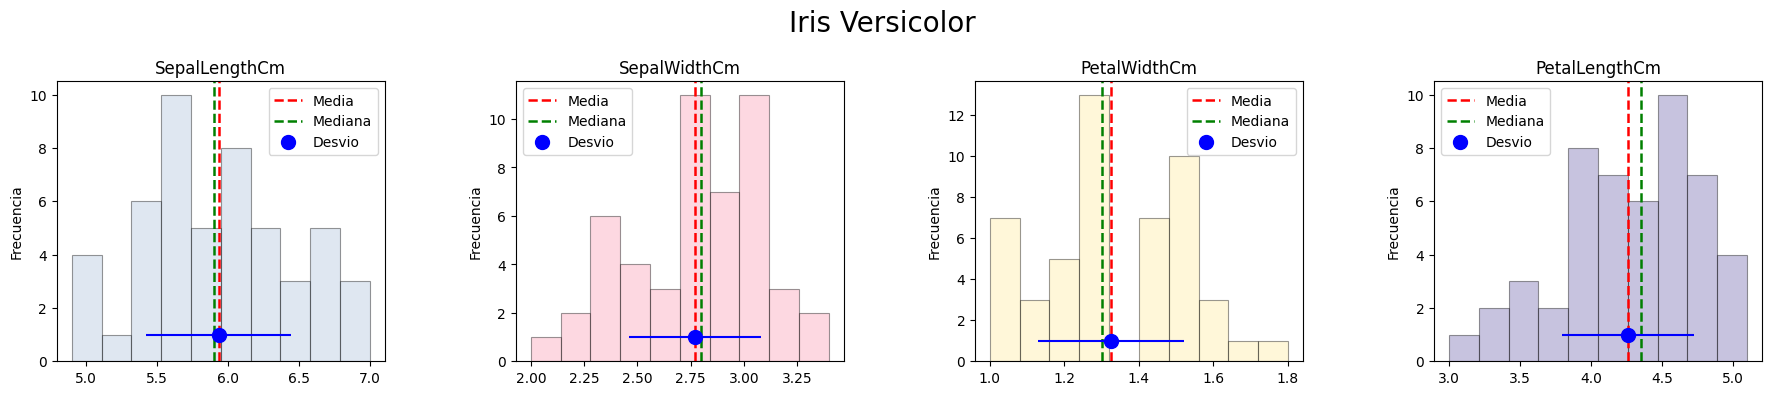

In [79]:
# Datos para los plots
mean_SepalLengthCm_versicolor = np.mean(data_iris_versicolor["SepalLengthCm"])
median_SepalLengthCm_versicolor = np.median(data_iris_versicolor["SepalLengthCm"])
sd_SepalLengthCm_versicolor = np.std(data_iris_versicolor["SepalLengthCm"])

mean_SepalWidthCm_versicolor = np.mean(data_iris_versicolor["SepalWidthCm"])
median_SepalWidthCm_versicolor = np.median(data_iris_versicolor["SepalWidthCm"])
sd_SepalWidthCm_versicolor = np.std(data_iris_versicolor["SepalWidthCm"])

mean_PetalWidthCm_versicolor = np.mean(data_iris_versicolor["PetalWidthCm"])
median_PetalWidthCm_versicolor = np.median(data_iris_versicolor["PetalWidthCm"])
sd_PetalWidthCm_versicolor= np.std(data_iris_versicolor["PetalWidthCm"])

mean_PetalLengthCm_versicolor= np.mean(data_iris_versicolor["PetalLengthCm"])
median_PetalLengthCm_versicolor = np.median(data_iris_versicolor["PetalLengthCm"])
sd_PetalLengthCm_versicolor= np.std(data_iris_versicolor["PetalLengthCm"])


# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(22, 4))
ax[0].hist(data_iris_versicolor["SepalLengthCm"],color = "lightsteelblue",alpha=0.4, edgecolor = 'black',  linewidth=0.8)
ax[0].axvline(mean_SepalLengthCm_versicolor , color='red', linestyle='dashed',linewidth= 1.8, label= 'Media')
ax[0].axvline(median_SepalLengthCm_versicolor,  color='green', linestyle='dashed',linewidth= 1.8, label= 'Mediana')
ax[0].errorbar(mean_SepalLengthCm_versicolor,1,xerr=sd_SepalLengthCm_versicolor,color='blue',fmt='o',markersize=10,label='Desvio')

#2do plot
ax[1].hist(data_iris_versicolor["SepalWidthCm"],color = "#fa9fb5",alpha=0.4, edgecolor = 'black',  linewidth=0.8)
ax[1].axvline(mean_SepalWidthCm_versicolor,  color='red', linestyle='dashed',linewidth= 1.8, label= 'Media')
ax[1].axvline(median_SepalWidthCm_versicolor,  color='green', linestyle='dashed',linewidth= 1.8, label= 'Mediana')
ax[1].errorbar(mean_SepalWidthCm_versicolor,1,xerr=sd_SepalWidthCm_versicolor,color='blue',fmt='o',markersize=10,label='Desvio')


#3ero plot
ax[2].hist(data_iris_versicolor["PetalWidthCm"],color = "#ffeda0",alpha=0.4, edgecolor = 'black',  linewidth=0.8)
ax[2].axvline(mean_PetalWidthCm_versicolor,  color='red', linestyle='dashed',linewidth= 1.8, label= 'Media')
ax[2].axvline(median_PetalWidthCm_versicolor,  color='green', linestyle='dashed',linewidth= 1.8, label= 'Mediana')
ax[2].errorbar(mean_PetalWidthCm_versicolor,1,xerr=sd_PetalWidthCm_versicolor,color='blue',fmt='o',markersize=10,label='Desvio')


#4to plot
ax[3].hist(data_iris_versicolor["PetalLengthCm"],color = "#756bb1",alpha=0.4, edgecolor = 'black',  linewidth=0.8)
ax[3].axvline(mean_PetalLengthCm_versicolor,  color='red', linestyle='dashed',linewidth= 1.8, label= 'Media')
ax[3].axvline(median_PetalLengthCm_versicolor,  color='green', linestyle='dashed',linewidth= 1.8, label= 'Mediana')
ax[3].errorbar(mean_PetalLengthCm_versicolor,1,xerr=sd_PetalLengthCm_versicolor,color='blue',fmt='o',markersize=10,label='Desvio')


# Titulo
ax[0].set_title('SepalLengthCm')
ax[1].set_title('SepalWidthCm')
ax[2].set_title('PetalWidthCm')
ax[3].set_title('PetalLengthCm')
# EJES
ax[0].set_ylabel('Frecuencia')
ax[1].set_ylabel('Frecuencia')
ax[2].set_ylabel('Frecuencia')
ax[3].set_ylabel('Frecuencia')


# Legenda
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
plt.suptitle('Iris Versicolor',fontsize=20)
# Configuration of subplots
plt.subplots_adjust(left=0.125,
            bottom=0.1,
            right=0.9,
            top=0.8,
            wspace=0.4,
            hspace=0.4)

# Analisis de Iris Virginica

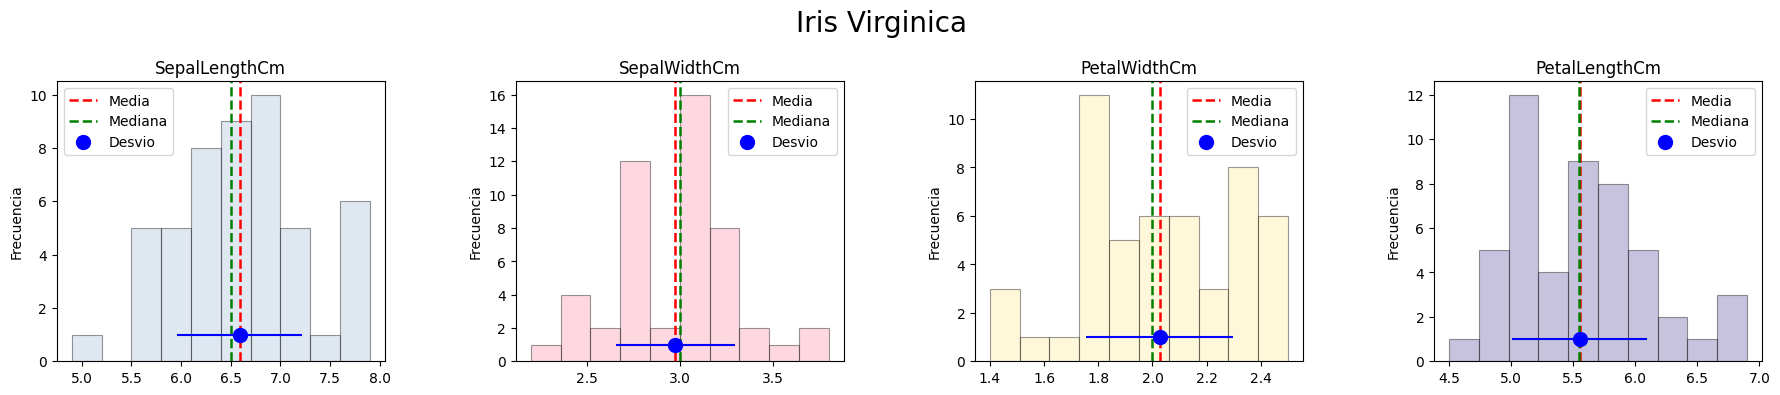

In [74]:
# Datos para los plots
mean_SepalLengthCm_virginica = np.mean(data_iris_virginica["SepalLengthCm"])
median_SepalLengthCm_virginica = np.median(data_iris_virginica["SepalLengthCm"])
sd_SepalLengthCm_virginica= np.std(data_iris_virginica["SepalLengthCm"])

mean_SepalWidthCm_virginica = np.mean(data_iris_virginica["SepalWidthCm"])
median_SepalWidthCm_virginica = np.median(data_iris_virginica["SepalWidthCm"])
sd_SepalWidthCm_virginica = np.std(data_iris_virginica["SepalWidthCm"])

mean_PetalWidthCm_virginica= np.mean(data_iris_virginica["PetalWidthCm"])
median_PetalWidthCm_virginica = np.median(data_iris_virginica["PetalWidthCm"])
sd_PetalWidthCm_virginica= np.std(data_iris_virginica["PetalWidthCm"])

mean_PetalLengthCm_virginica= np.mean(data_iris_virginica["PetalLengthCm"])
median_PetalLengthCm_virginica = np.median(data_iris_virginica["PetalLengthCm"])
sd_PetalLengthCm_virginica= np.std(data_iris_virginica["PetalLengthCm"])


# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(22, 4))
ax[0].hist(data_iris_virginica["SepalLengthCm"],color = "lightsteelblue",alpha=0.4, edgecolor = 'black',  linewidth=0.8)
ax[0].axvline(mean_SepalLengthCm_virginica,  color='red', linestyle='dashed',linewidth= 1.8, label= 'Media')
ax[0].axvline(median_SepalLengthCm_virginica,  color='green', linestyle='dashed',linewidth= 1.8, label= 'Mediana')
ax[0].errorbar(mean_SepalLengthCm_virginica,1,xerr=sd_SepalLengthCm_virginica,color='blue',fmt='o',markersize=10,label='Desvio')

#2do plot
ax[1].hist(data_iris_virginica["SepalWidthCm"],color = "#fa9fb5",alpha=0.4, edgecolor = 'black',  linewidth=0.8)
ax[1].axvline(mean_SepalWidthCm_virginica,  color='red', linestyle='dashed',linewidth= 1.8, label= 'Media')
ax[1].axvline(median_SepalWidthCm_virginica,  color='green', linestyle='dashed',linewidth= 1.8, label= 'Mediana')
ax[1].errorbar(mean_SepalWidthCm_virginica,1,xerr=sd_SepalWidthCm_virginica,color='blue',fmt='o',markersize=10,label='Desvio')


#3ero plot
ax[2].hist(data_iris_virginica["PetalWidthCm"],color = "#ffeda0",alpha=0.4, edgecolor = 'black',  linewidth=0.8)
ax[2].axvline(mean_PetalWidthCm_virginica,  color='red', linestyle='dashed',linewidth= 1.8, label= 'Media')
ax[2].axvline(median_PetalWidthCm_virginica,  color='green', linestyle='dashed',linewidth= 1.8, label= 'Mediana')
ax[2].errorbar(mean_PetalWidthCm_virginica,1,xerr=sd_PetalWidthCm_virginica,color='blue',fmt='o',markersize=10,label='Desvio')


#4to plot
ax[3].hist(data_iris_virginica["PetalLengthCm"],color = "#756bb1",alpha=0.4, edgecolor = 'black',  linewidth=0.8)
ax[3].axvline(mean_PetalLengthCm_virginica,  color='red', linestyle='dashed',linewidth= 1.8, label= 'Media')
ax[3].axvline(median_PetalLengthCm_virginica,  color='green', linestyle='dashed',linewidth= 1.8, label= 'Mediana')
ax[3].errorbar(mean_PetalLengthCm_virginica,1,xerr=sd_PetalLengthCm_virginica,color='blue',fmt='o',markersize=10,label='Desvio')


# Titulo
ax[0].set_title('SepalLengthCm')
ax[1].set_title('SepalWidthCm')
ax[2].set_title('PetalWidthCm')
ax[3].set_title('PetalLengthCm')
# EJES
ax[0].set_ylabel('Frecuencia')
ax[1].set_ylabel('Frecuencia')
ax[2].set_ylabel('Frecuencia')
ax[3].set_ylabel('Frecuencia')


# Legenda
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
plt.suptitle('Iris Virginica',fontsize=20)
# Configuration of subplots
plt.subplots_adjust(left=0.125,
            bottom=0.1,
            right=0.9,
            top=0.8,
            wspace=0.4,
            hspace=0.4)

Algunas conclusiones:

*   En cuanto a la variable ***SepalLengthCm*** vemos que Iris-setosa es principalmente menor que de las otras dos especies. Mientras que la diferencia es menos clara entre Iris-versicolor e Iris-virginica.
*   Con respecto a ***SepalWidthCm*** la especie Setosa parece ser mayor que las demás especies, pero solo en algunos casos, no seria significativa la diferencia. Mientras que virginica e setosa son bastante similares.

*  El ***PetalWidthCm*** de las flores de setosa es  inferior a las demás especies. Seguida por versicolor mientras que la mas grande es virginica.

*   Al igual que El ***PetalWidthCm*** , el ***PetalLengthCm*** de setosa es inferior a la de las otras dos especies. Si bien se observa una pequeña diferencia entre versicolor e virginica, esta no es tan significativa es menos clara. Pero la longitud de las flores versicolor es ligeramente menor que las de virginica.




<ipython-input-52-452fc4a53635>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_iris.corr(), cmap='Blues', annot=True);


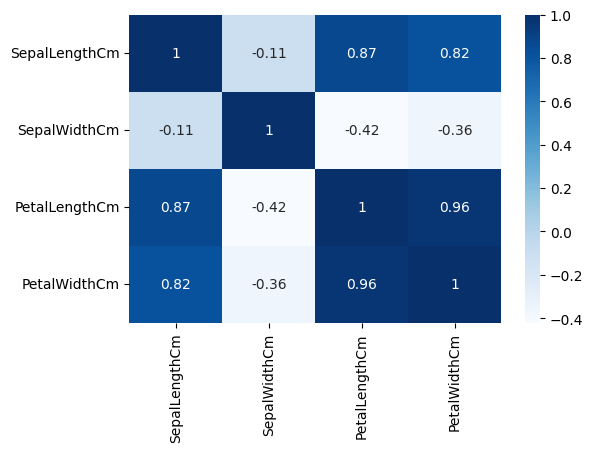

In [52]:
# Previa a la correlacion eliminamos la columna de ID que no sera necesaria
data_iris.drop('Id', axis=1, inplace=True)
fig = plt.figure(figsize = (6,4))
sns.heatmap(data_iris.corr(), cmap='Blues', annot=True);

En la figura anterior vemos un analisis de correlacion entre las variables. En general tenemos alta correlacion entre la mayoria de las variables (r> 0.87)

*  Vemos que existe una alta correlación positiva entre la ***PetalLengthCm*** y ***PetalWidthCm*** (r = 0.96).
*   Asi como tambien alta correlación positiva entre la ***PetalLengthCm*** y la ***SepalLengthCm*** (r = 0.87)
*   Tambien existe una relacion positiva alta entre ***PetalWidthCm*** y ***SepalLengthCm*** (r = 0.82)
Las demas relaciones son negativas y bajas

